# TASK 2

Titanic Classification:
    
Build a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python.

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

Loading the Dataset

In [2]:
df = pd.read_csv('Titanic_Classification.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df = df.drop(columns='Cabin',axis=1)

In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [14]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [15]:
print(df['Embarked'].mode()[0])

S


In [16]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [18]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

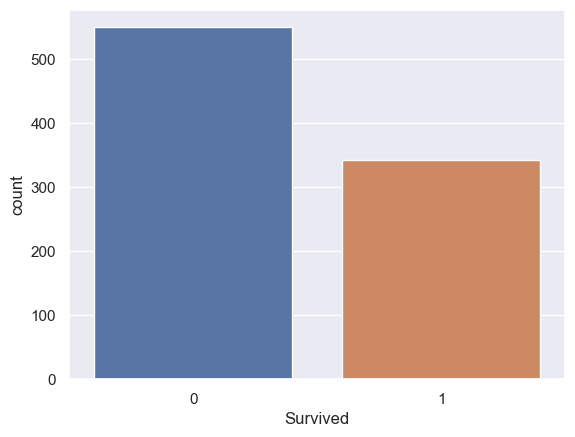

In [20]:
sns.countplot(x='Survived',data=df)

In [21]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

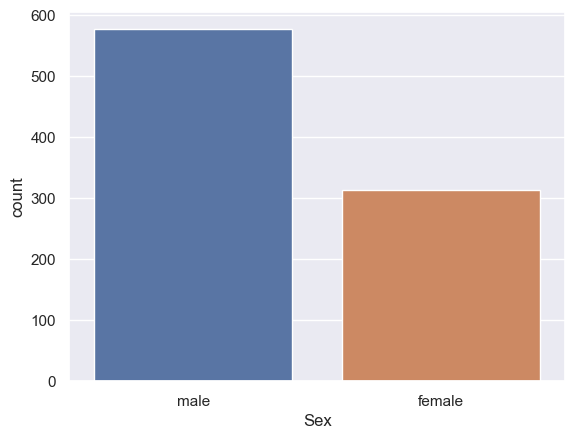

In [22]:
sns.countplot(x='Sex',data = df)

<Axes: xlabel='Sex', ylabel='count'>

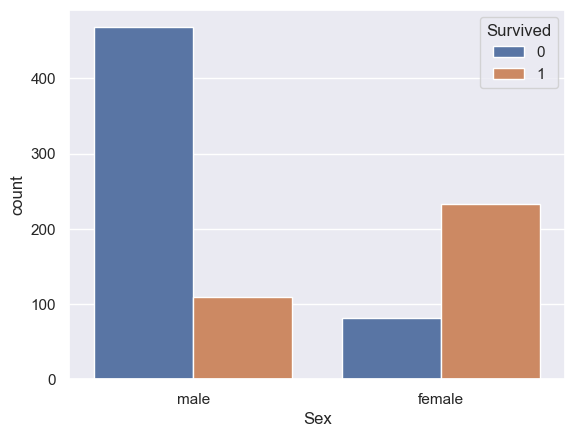

In [23]:
sns.countplot(x='Sex',hue='Survived',data = df)

<Axes: xlabel='Pclass', ylabel='count'>

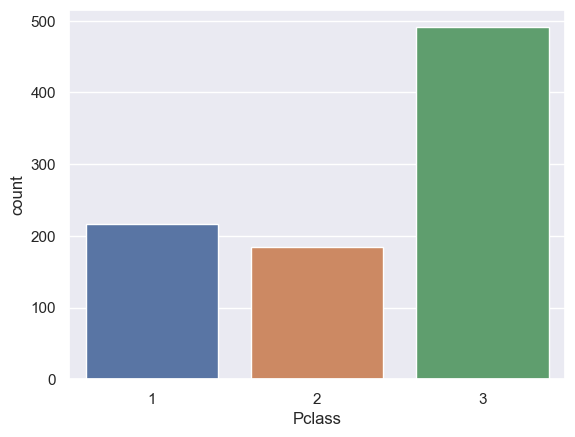

In [24]:
sns.countplot(x='Pclass',data = df)

<Axes: xlabel='Pclass', ylabel='count'>

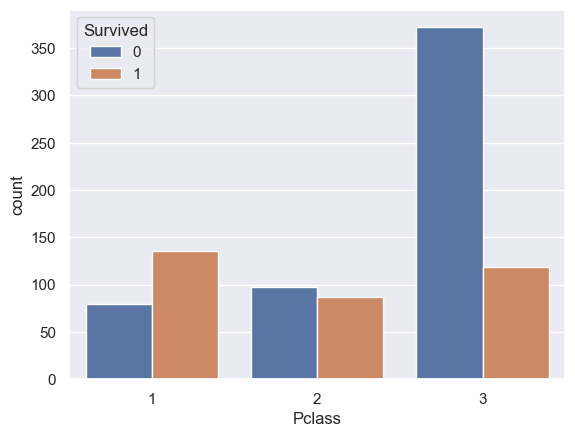

In [25]:
sns.countplot(x='Pclass',hue='Survived',data = df)

In [26]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [28]:
df.describe(include='O')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


In [29]:
df1 = df['Sex'].value_counts()
df1

male      577
female    314
Name: Sex, dtype: int64

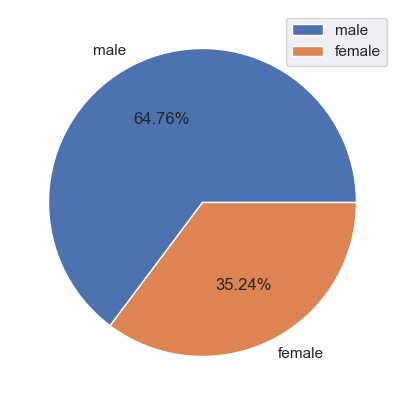

In [30]:
plt.figure(figsize=(5,5))
plt.pie(df1.values,labels=df1.index,autopct='%.2f%%')
plt.legend()
plt.show()

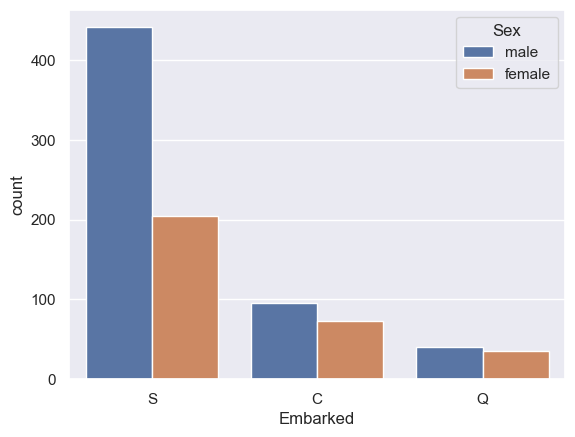

In [31]:
sns.countplot(x=df['Embarked'],hue=df['Sex'])
plt.show()

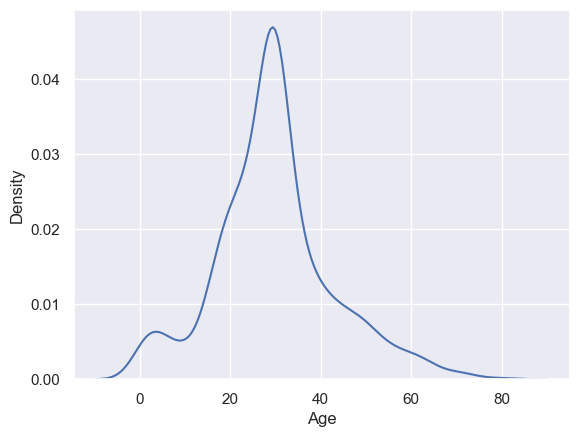

In [32]:
sns.kdeplot(x=df['Age'])
plt.show()

0    549
1    342
Name: Survived, dtype: int64


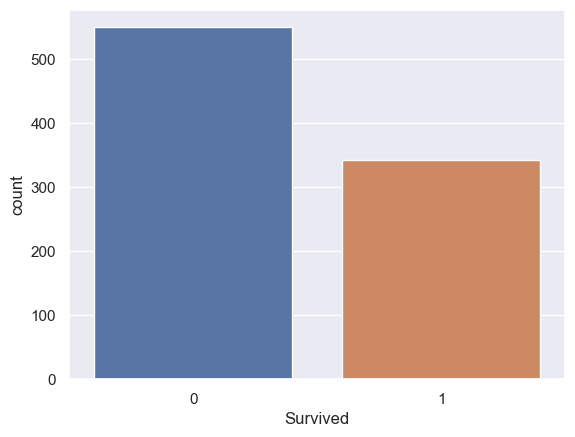

In [33]:
print(df['Survived'].value_counts())
sns.countplot(x=df['Survived'])
plt.show()

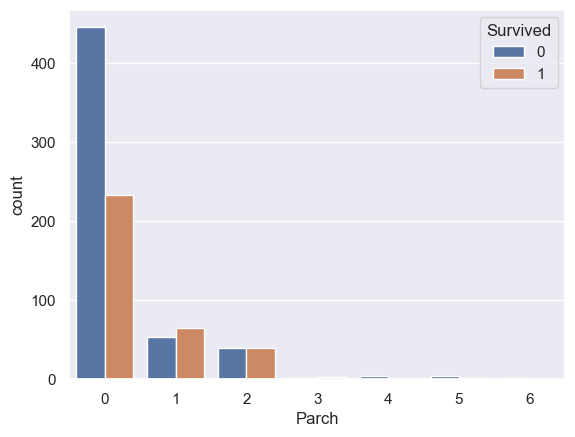

In [34]:
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.show()

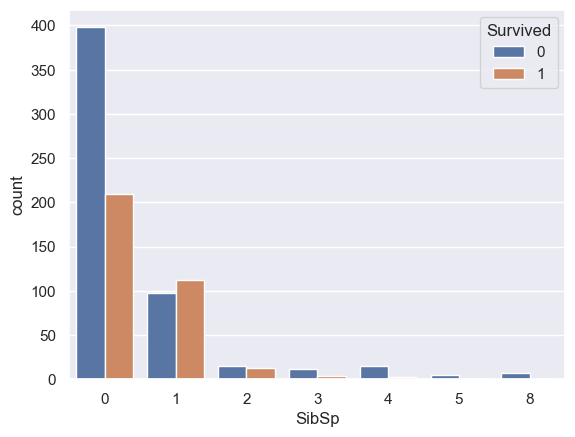

In [35]:
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.show()

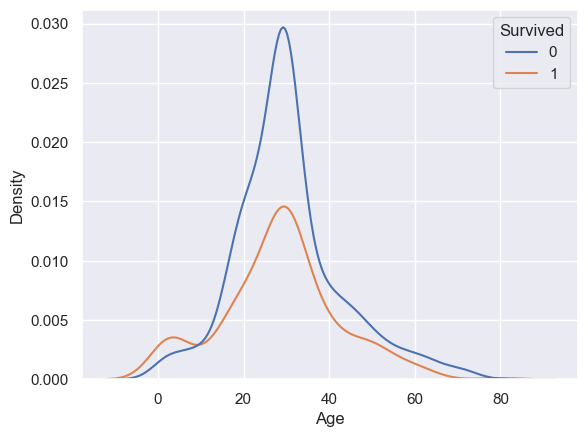

In [36]:
sns.kdeplot(x=df['Age'],hue=df['Survived'])
plt.show()

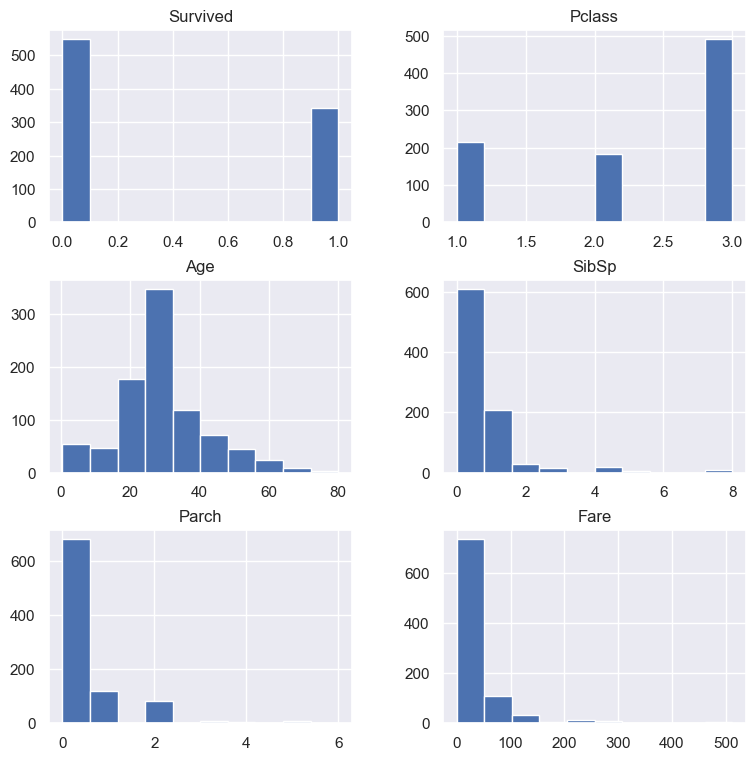

In [37]:
df.hist(figsize=(9,9))
plt.show()

In [38]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


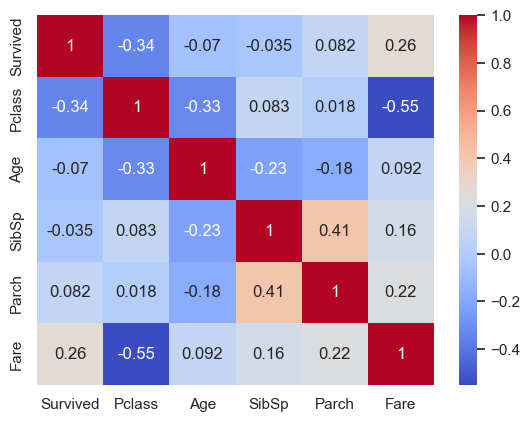

In [39]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

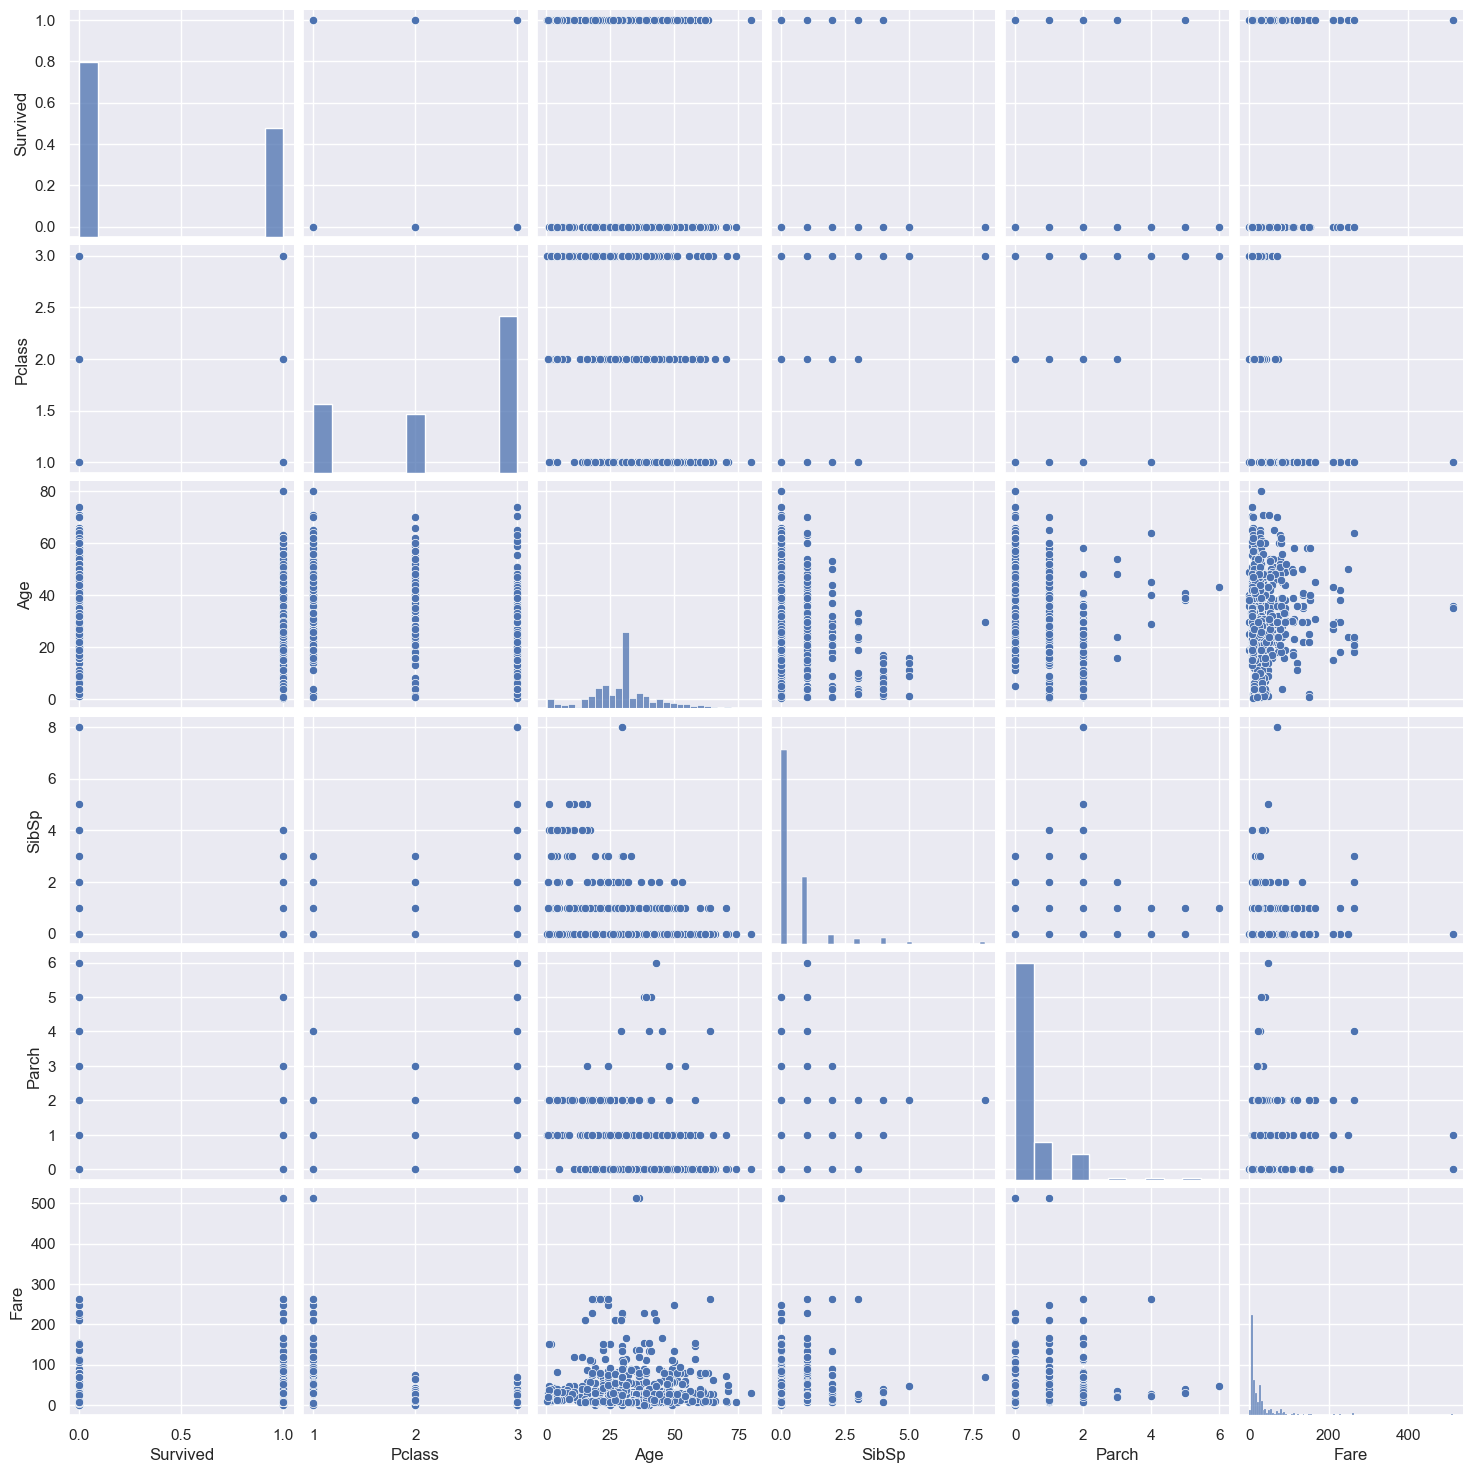

In [40]:
sns.pairplot(df)
plt.show()

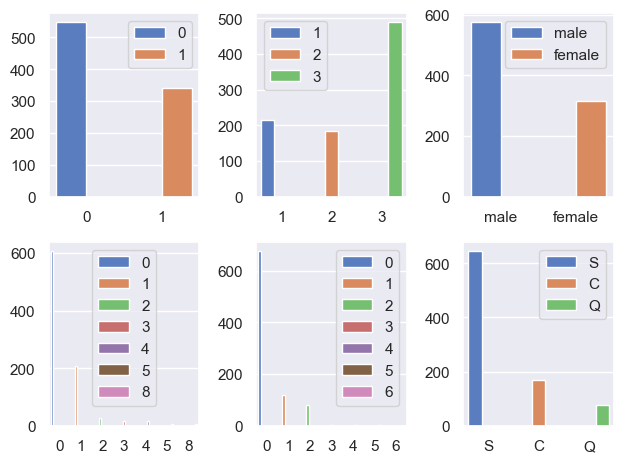

In [41]:
i = 1
sns.set_palette(sns.color_palette('muted'))
for column in ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]:
    plt.subplot(2, 3, i)
    sns.barplot(x=df[column].value_counts().index,
                y=df[column].value_counts().values, hue=df[column].value_counts().index)
    i += 1
plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

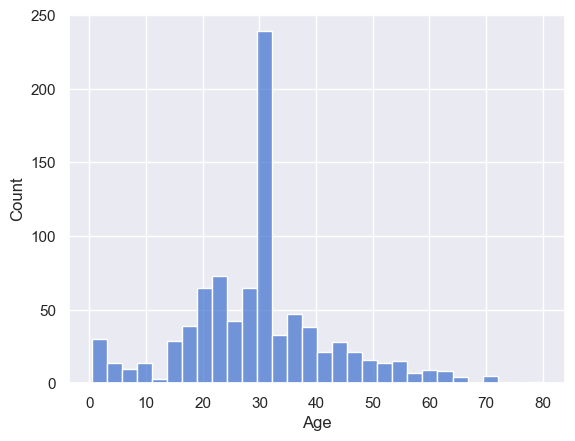

In [42]:
sns.histplot(df['Age'])

<Axes: xlabel='Fare', ylabel='Count'>

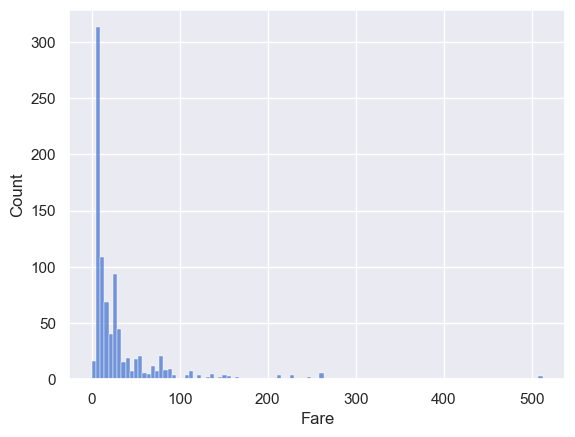

In [43]:
sns.histplot(df['Fare'])

In [44]:
df.Sex.replace(to_replace=['male', 'female'], value=[1, 0], inplace=True)
df.Embarked.replace(to_replace=['S', 'C', 'Q'], value=[0, 1, 2], inplace=True)

In [45]:
for i in [i for i in df.columns]:
    if df[i].nunique() >= 12:
        Q1 = df[i].quantile(0.20)
        Q3 = df[i].quantile(0.80)
        IQR = Q3 - Q1
        df = df[df[i] <= (Q3+(1.5*IQR))]
        df = df[df[i] >= (Q1-(1.5*IQR))]
df = df.reset_index(drop=True)

In [46]:
from imblearn.over_sampling import SMOTE
x_cols = ['Pclass', 'Sex', 'Fare', 'Embarked']
y_col = 'Survived'

x = df[x_cols]
y = df[y_col]


smote = SMOTE()
X, Y = smote.fit_resample(x, y)
df = pd.DataFrame(X, columns=x_cols)
df[y_col] = Y

In [47]:
from sklearn.model_selection import train_test_split

x = df[x_cols]
y = df[y_col]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train_std = std.fit_transform(x_train)
x_train_std = pd.DataFrame(x_train_std, columns=x_cols)

x_test_std = std.fit_transform(x_test)
x_test_std = pd.DataFrame(x_test_std, columns=x_cols)

In [49]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(x_train_std, y_train)
y_pred = clf.predict(x_test_std)

              precision    recall  f1-score   support

           0       0.68      0.85      0.76       102
           1       0.82      0.62      0.71       109

    accuracy                           0.73       211
   macro avg       0.75      0.74      0.73       211
weighted avg       0.75      0.73      0.73       211



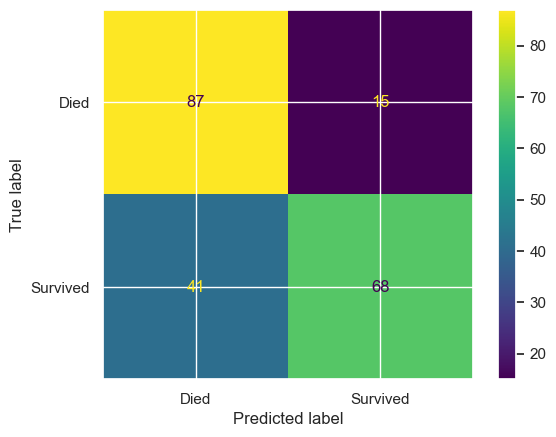

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=['Died', 'Survived']).plot()

In [51]:
model=LogisticRegression()

In [52]:
model.fit(x_train,y_train)

LogisticRegression()

In [53]:
x_train_prediction=model.predict(x_train)

In [54]:
x_train_prediction

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [55]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print('Accuracy:',training_data_accuracy)

Accuracy: 0.7912218268090154


In [56]:
x_test_prediction=model.predict(x_test)

In [57]:
x_test_prediction

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [58]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print('Accuracy:',test_data_accuracy)

Accuracy: 0.7393364928909952


In [59]:
report = classification_report(y_test,x_test_prediction)

In [60]:
report

'              precision    recall  f1-score   support\n\n           0       0.72      0.76      0.74       102\n           1       0.76      0.72      0.74       109\n\n    accuracy                           0.74       211\n   macro avg       0.74      0.74      0.74       211\nweighted avg       0.74      0.74      0.74       211\n'